In [ ]:
!pip install -q langchain llama_index llama-index-embeddings-langchain llama-index-embeddings-huggingface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 973.5/973.5 kB 15.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.2/310.2 kB 29.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.4/124.4 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.4/15.4 MB 48.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 52.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.7/320.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 51.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 853.2/853.2 kB 45.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━

In [ ]:
!pip install -q pymupdf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.8/15.8 MB 57.0 MB/s eta 0:00:00


In [ ]:
! pip install -U -q langchain-community pymupdf4llm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 11.7 MB/s eta 0:00:00


In [ ]:
from llama_index.embeddings.langchain import LangchainEmbedding
from langchain.embeddings.huggingface import HuggingFaceEmbeddings

from llama_index.core.llama_pack.base import BaseLlamaPack
from llama_index.core import SimpleDirectoryReader

from llama_index.core.node_parser import SemanticSplitterNodeParser, SentenceSplitter
from llama_index.core.llms import ChatMessage
from llama_index.llms.openai import OpenAI
from llama_index.embeddings.openai import OpenAIEmbedding
from llama_index.core import Document

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
embeddings=LangchainEmbedding(
    HuggingFaceEmbeddings(model_name="BAAI/bge-large-en-v1.5")
)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/94.6k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/711k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

In [ ]:
file_path =  '/content/Galvin.pdf'

In [ ]:
import pymupdf4llm
from langchain.text_splitter import MarkdownTextSplitter

# Get the MD text
md_text = pymupdf4llm.to_markdown(file_path)  # get markdown for all pages

In [ ]:
import os

# Assuming file_path and md_text are defined
file_name = os.path.splitext(os.path.basename(file_path))[0] + '.txt'

with open(file_name, 'w') as file:
    file.write(md_text)

In [ ]:
documents = SimpleDirectoryReader(input_files=[file_name]).load_data()

In [ ]:
len(documents)

1

In [ ]:
splitter = SemanticSplitterNodeParser(
    buffer_size=1,
    breakpoint_percentile_threshold=97,
    embed_model=embeddings,
)

In [ ]:
nodes = splitter.get_nodes_from_documents(documents)

In [ ]:
content = []
for node in nodes:
    if(node.get_content() != '' and len(node.get_content().split()) > 400):
        content.append(node.get_content())

In [ ]:
len(content)

348

In [ ]:
lens = [len(con.split()) for con in content]

In [ ]:
def create_histogram(lengths, bins=10, title="Histogram of Lengths", xlabel="Length", ylabel="Frequency"):

    plt.hist(lengths, bins=bins, edgecolor='black')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

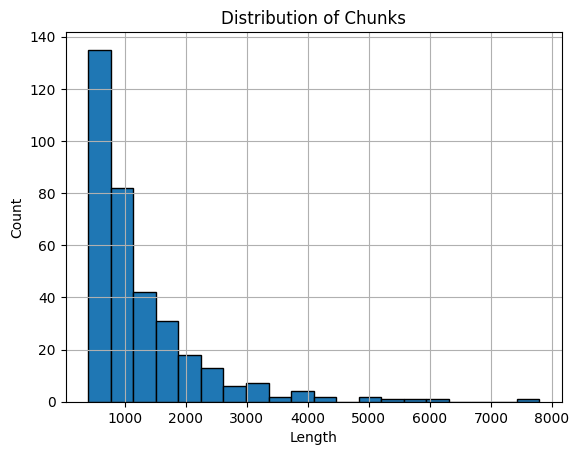

In [ ]:
create_histogram(lens, bins=20, title="Distribution of Chunks", xlabel="Length", ylabel="Count")

In [ ]:
np.array(lens).mean(), np.array(lens).max() , np.array(lens).min()

(1246.0028735632184, 7790, 401)

In [ ]:
content_small = []
content_medium = []
content_large = []
content_to_split = []
t = []

for c in content:
    chunk_size = len(c.split())
    t.append(chunk_size)
    if chunk_size < 1500:
        content_small.append(c)
    elif 1500 <= chunk_size < 3000:
        content_medium.append(c)
    elif 3000 <= chunk_size < 4096:
        content_large.append(c)
    else:
        content_to_split.append(c)

print("Number of items in content_small:", len(content_small))
print("Number of items in content_medium:", len(content_medium))
print("Number of items in content_large:", len(content_large))
print("Number of items in content_to_split:", len(content_to_split))

Number of items in content_small: 258
Number of items in content_medium: 69
Number of items in content_large: 13
Number of items in content_to_split: 8


In [ ]:
sent_splitter = SentenceSplitter(
    chunk_size=2048,
    chunk_overlap=20,
    separator=" "
)

In [ ]:
new_nodes = sent_splitter.get_nodes_from_documents([Document(text=c) for c in content_to_split])

In [ ]:
new_content = []
for node in new_nodes:
    if(node.get_content() != '' and len(node.get_content().split()) > 400):
        new_content.append(node.get_content())

In [ ]:
new_lens = [len(c.split()) for c in new_content]

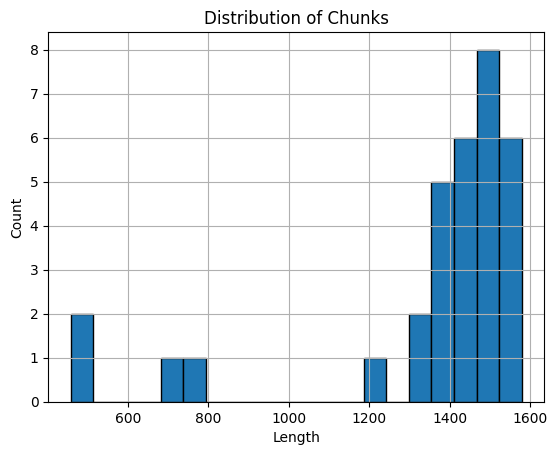

In [ ]:
create_histogram(new_lens, bins=20, title="Distribution of Chunks", xlabel="Length", ylabel="Count")

In [ ]:
new_content_small = []
new_content_medium = []
new_content_large = []
new_content_to_split = []

for c in new_content:
    chunk_size = len(c.split())
    t.append(chunk_size)
    if chunk_size < 1500:
        new_content_small.append(c)
    elif 1500 <= chunk_size < 3000:
        new_content_medium.append(c)
    elif 3000 <= chunk_size < 4096:
        new_content_large.append(c)
    else:
        new_content_to_split.append(c)

print("Number of items in content_small:", len(new_content_small))
print("Number of items in content_medium:", len(new_content_medium))
print("Number of items in content_large:", len(new_content_large))
print("Number of items in content_to_split:", len(new_content_to_split))

Number of items in content_small: 24
Number of items in content_medium: 8
Number of items in content_large: 0
Number of items in content_to_split: 0


In [ ]:
content_small += new_content_small
content_medium += new_content_medium
content_large += new_content_large

print("Number of items in content_small:", len(content_small))
print("Number of items in content_medium:", len(content_medium))
print("Number of items in content_large:", len(content_large))

Number of items in content_small: 282
Number of items in content_medium: 77
Number of items in content_large: 13


In [ ]:
chunk_dir = file_name.split('.')[0] + '_chunks'

In [ ]:
if not os.path.exists(chunk_dir):
    os.mkdir(chunk_dir)

if not os.path.exists(os.path.join(chunk_dir, 'small')):
    os.mkdir(os.path.join(chunk_dir, 'small'))

if not os.path.exists(os.path.join(chunk_dir, 'medium')):
    os.mkdir(os.path.join(chunk_dir, 'medium'))

if not os.path.exists(os.path.join(chunk_dir, 'large')):
    os.mkdir(os.path.join(chunk_dir, 'large'))


In [ ]:
contents = {
    os.path.join(chunk_dir, 'small'): content_small,
    os.path.join(chunk_dir, 'medium'): content_medium,
    os.path.join(chunk_dir, 'large'): content_large
}


In [ ]:
for directory, content_list in contents.items():

    for i, chunk in enumerate(content_list):
        # Define the file name
        file_name = os.path.join(directory, f"chunk_{i}.txt")
        # Write the chunk to the file
        with open(file_name, 'w') as file:
            file.write(chunk)

    # Check if the number of files equals the size of the content list
    assert len(os.listdir(directory)) == len(content_list), f"Number of files in {directory} does not match the size of the content list"


In [ ]:
!zip -r data.zip Galvin_chunks/

  adding: Galvin_chunks/ (stored 0%)
  adding: Galvin_chunks/small/ (stored 0%)
  adding: Galvin_chunks/small/chunk_173.txt (deflated 59%)
  adding: Galvin_chunks/small/chunk_48.txt (deflated 61%)
  adding: Galvin_chunks/small/chunk_69.txt (deflated 60%)
  adding: Galvin_chunks/small/chunk_252.txt (deflated 59%)
  adding: Galvin_chunks/small/chunk_171.txt (deflated 51%)
  adding: Galvin_chunks/small/chunk_122.txt (deflated 55%)
  adding: Galvin_chunks/small/chunk_241.txt (deflated 54%)
  adding: Galvin_chunks/small/chunk_100.txt (deflated 63%)
  adding: Galvin_chunks/small/chunk_232.txt (deflated 60%)
  adding: Galvin_chunks/small/chunk_152.txt (deflated 51%)
  adding: Galvin_chunks/small/chunk_228.txt (deflated 52%)
  adding: Galvin_chunks/small/chunk_31.txt (deflated 61%)
  adding: Galvin_chunks/small/chunk_191.txt (deflated 60%)
  adding: Galvin_chunks/small/chunk_229.txt (deflated 55%)
  adding: Galvin_chunks/small/chunk_162.txt (deflated 59%)
  adding: Galvin_chunks/small/chunk_19